
# Importing Essential Libraries
Other than the essential libraries that were learnt and used in the labs such as Numpy, Pandas, Seaborn and the various sklearn functions, other libraries that were used in this portion of the project includes the libraries needed for regression modelling as well as for model analysis such as:

- XGBoost Library: https://xgboost.readthedocs.io/en/latest/build.html
- CatBoost: https://catboost.ai/docs/concepts/python-installation.html
- RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- Ridge Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- Lasso Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- TreeInterpreter: https://pypi.org/project/treeinterpreter/

In [1]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [2]:

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Libraries used for Modelling
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

# Importing Dataset
The dataset, which is in csv format, is named 'listings.csv'. Based on the work done during Exploratory Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:

Room Type
Property Type
Number of Bedrooms
Amenities
Number of Reviews
As such, we single out these variables (together with price) to form a new dataframe.

In [3]:
listingDF =  pd.read_csv('listings.csv')

In [4]:
newListingsDF = listingDF[['room_type','property_type','bedrooms','amenities','number_of_reviews', 'price']]
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   room_type          3818 non-null   object 
 1   property_type      3817 non-null   object 
 2   bedrooms           3812 non-null   float64
 3   amenities          3818 non-null   object 
 4   number_of_reviews  3818 non-null   int64  
 5   price              3818 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 179.1+ KB


# Data-Cleaning

Data Cleaning is done to remove the irrelevant/insignificant parts of the data, modify the data for easy manipulation and correcting them so as to prepare them for modelling.

# Amenities
Displays the different types of amenities available for each listing
To clean the data in this variable:

- Checking and listing down all the different amenities that were offered
- Separating the different amenities and creating a dedicated column for each amenity
- Removing amenities which have NULL values for all listings

In [5]:
# Creating a set of all possible amenities
amenities_list = list(newListingsDF.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [6]:
# Creating column variables for each of the different amenities and adding them into the original dataframe
newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('TV'), 'tv'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Elevator'), 'elevator'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('parking'), 'parking'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/tmp/ipython-input-6-631897346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
/tmp/ipython-input-6-631897346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
/tmp/ipython-input-6-631897346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [7]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = newListingsDF.iloc[:,41:].columns
newListingsDF[cols_to_replace_nulls] = newListingsDF[cols_to_replace_nulls].fillna(0)

# Dropping the original amenities variable
newListingsDF.drop('amenities', axis=1, inplace=True)

/tmp/ipython-input-7-937827799.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.drop('amenities', axis=1, inplace=True)


In [8]:
# Removing the amenities which have all NULL values for all listings
newListingsDF = newListingsDF.dropna(axis=1, how='all')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3817 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   object 
 5   breakfast              291 non-null    float64
 6   tv                     2741 non-null   float64
 7   white_goods            3134 non-null   float64
 8   elevator               785 non-null    float64
 9   gym                    442 non-null    float64
 10  hot_tub_sauna_or_pool  159 non-null    float64
 11  internet               3692 non-null   float64
 12  pets_allowed           1169 non-null   float64
 13  secure                 727 non-null    float64
 14  accessible             300 non-null    float64
dtypes: f

# Property Type
- Displays the property type of a listing
To clean the data in this variable:

- Grouping property types whose low counts might be insignificant and not provide us with enough information
- Thus, grouping property types that have counts that are < 30

In [9]:
newListingsDF.head()

,room_type,property_type,bedrooms,number_of_reviews,price,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,secure,accessible
0,Entire home/apt,Apartment,1.0,207,$85.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,Entire home/apt,Apartment,1.0,43,$150.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2,Entire home/apt,House,5.0,20,$975.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3,Entire home/apt,Apartment,0.0,0,$100.00,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
4,Entire home/apt,House,3.0,38,$450.00,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [10]:
# Checking to see the total number of each type of property
newListingsDF.property_type.value_counts()

,count
property_type,
House,1733
Apartment,1708
Townhouse,118
Condominium,91
Loft,40
Bed & Breakfast,37
Other,22
Cabin,21
Camper/RV,13


In [11]:
# Grouping property types with less than <30 count into 'Other'
newListingsDF.loc[~newListingsDF.property_type.isin(['House', 'Apartment','Townhouse','Condominium','Loft',"Bed & Breakfast"]), 'property_type'] = 'Other'
newListingsDF.property_type.value_counts()

,count
property_type,
House,1733
Apartment,1708
Townhouse,118
Other,91
Condominium,91
Loft,40
Bed & Breakfast,37



# Price
- Displays the price/cost of a listing

To clean the data in this variable:

- Since the Price variable is currently a string (with the "$" symbol), the variable is thus converted into an integer

In [12]:
newListingsDF.price = newListingsDF.price.str[1:-3]
newListingsDF.price = newListingsDF.price.str.replace(",", "")
newListingsDF.price = newListingsDF.price.astype('int64')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3818 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   int64  
 5   breakfast              291 non-null    float64
 6   tv                     2741 non-null   float64
 7   white_goods            3134 non-null   float64
 8   elevator               785 non-null    float64
 9   gym                    442 non-null    float64
 10  hot_tub_sauna_or_pool  159 non-null    float64
 11  internet               3692 non-null   float64
 12  pets_allowed           1169 non-null   float64
 13  secure                 727 non-null    float64
 14  accessible             300 non-null    float64
dtypes: f

In [13]:
# To convert NaN values to 0 for preparation for Modelling
newListingsDF = newListingsDF.fillna(0)
# Checking to ensure that there are no NULL entries
newListingsDF.isnull().sum()

,0
room_type,0
property_type,0
bedrooms,0
number_of_reviews,0
price,0
breakfast,0
tv,0
white_goods,0
elevator,0
gym,0


# Regression Models
Regression models are used to target a prediction value based on independent variables and it is mostly used for finding out the relationship between variables as well as preidction/forecasting.

Here, we use regression models to help predict the price based on the significant predictor variables identified in Exploratory Analysis.

- **Predictor Variables:** Room_type, Property_type, Bedrooms, Number_of_Reviews, Amenities
- **Response Variable: **Price
The following regression models will be carried out:

Linear Regression
Ridge Regression
Lasso Regression
Random Forest Regression
XGBoost
CatBoost

# Data Preparation
The following will be done to the data to ensure its fit into the different regression models:

- Encoding the categorical variables so that it can be fit into the regression models
- Separating the data into predictor and response variables
- Separating the data into training and testing sets (Training Sets: Testing Sets = 80% : 20%)

In [14]:
# One-hot encode the Categorial variables
transformedDF = pd.get_dummies(newListingsDF, columns=['room_type','property_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newTransformedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bedrooms                         3818 non-null   float64
 1   number_of_reviews                3818 non-null   int64  
 2   price                            3818 non-null   int64  
 3   breakfast                        3818 non-null   float64
 4   tv                               3818 non-null   float64
 5   white_goods                      3818 non-null   float64
 6   elevator                         3818 non-null   float64
 7   gym                              3818 non-null   float64
 8   hot_tub_sauna_or_pool            3818 non-null   float64
 9   internet                         3818 non-null   float64
 10  pets_allowed                     3818 non-null   float64
 11  secure                           3818 non-null   float64
 12  accessible          

In [15]:
# Separating X and y for Modelling
X = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"]]) #Predictor Variables
y = pd.DataFrame(newTransformedDF["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [16]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model 1: Linear Regression
Linear Regression is a machine learning algorithm that is based on supervised learning. It performs the regression task to predict a dependent variable value (in this case, price) based on given independent variables (in this case, the identified predictor variables).

It then tries to find a linear relationship between the variables and predicts the price based on the linear line.

Here, we have trained the model to follow the following formula:

**Regression Problem : Price = a x (Predictor Variables) + b**

The above is a general formula, however, since we have multiple predictor variables, there will be more than 1 coefficient (one for each predictor variable).

In [18]:

# Creating and fitting the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [19]:

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [127.80213001]

                         Predictors  Coefficients
0                          bedrooms     49.478643
1                         breakfast     -0.371777
2                                tv      2.534868
3                       white_goods     -0.074878
4                          elevator      8.917980
5                               gym      2.805521
6             hot_tub_sauna_or_pool      3.023848
7                          internet     -0.817553
8                      pets_allowed     -2.516840
9                            secure      0.770255
10                       accessible      0.027856
11                number_of_reviews     -4.448151
12        room_type_Entire_home_apt     13.020242
13           room_type_Private_room    -10.007548
14            room_type_Shared_room     -8.937859
15          property_type_Apartment     -3.286801
16  property_type_Bed_and_Breakfast      3.203660
17        property_type_Condominium      1.088746
18

In [20]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

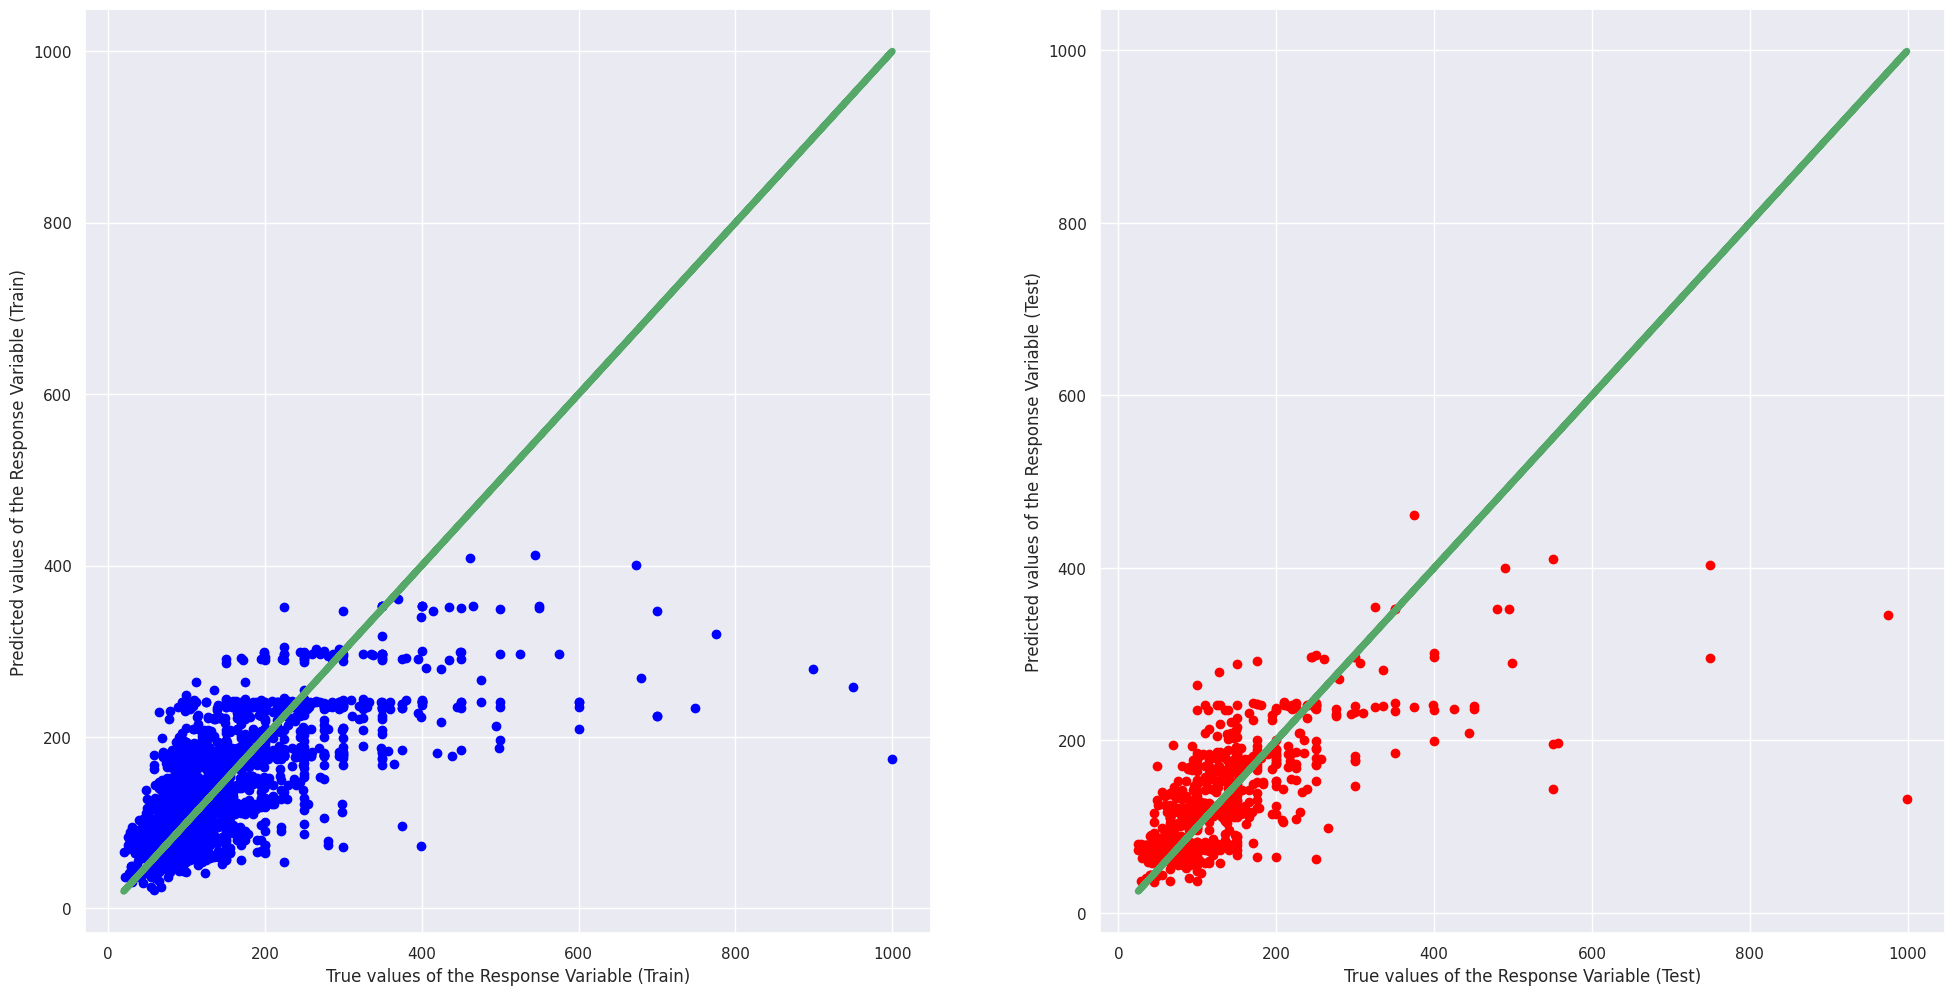

In [21]:

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Note that: Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

# Model 2: Ridge Regression
Ridge Regression is meant to be an upgrade to linear regression. It is similar to linear regression where it can be used to for regression and classification.

Ridge Regression is good at handling overfitting.

The difference in the equation for Ridge Regression is that it penalize RSS by adding another term and search for the minimization.

We can iterate different
 values as the additional term to find the best fit for a Ridge Regression model.

Ridge Regression does not drop any predictors unlike Lasso Regression, which is we will observe later on that the beta estimate will only converge to zero, but never reach zero.

In [22]:
#numpy array used for plotting Ridge and Lasson Regression later on
varArr = np.array(["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
"internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"])

In [23]:
# initializing the model
ridgeReg = Ridge(alpha=0).fit(X_train,y_train) #alpha is the lambda value

#store the predictions for each lambda/alpha value
ridgeTrainPred = []
ridgeTestPred = []
ridgeR2score = [] # store all the R2 values
lambdaVal = [] #store all values of lambda
#for plotting
ridgeDF = pd.DataFrame({'variable': varArr, 'estimate': ridgeReg.coef_.ravel()})


lambdas = np.arange(0,2000,1) #lambda value of 0 to positive 2000, in intervals of 1

for alpha in lambdas:
    ridgeReg = Ridge(alpha=alpha)
    ridgeReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridgeDF[var_name] = ridgeReg.coef_.ravel()
    #prediction
    ridgeTrainPred.append(ridgeReg.predict(X_train))
    ridgeTestPred.append(ridgeReg.predict(X_test))
    #storing the R2 scores and lambda value
    ridgeR2score.append(ridgeReg.score(X_train,y_train))
    lambdaVal.append(alpha)

ridgeDF = ridgeDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()


bestRidgeR2 = max(ridgeR2score)
print("The highest R2 value: ",bestRidgeR2)
print("The value of lambda that minimises: ",lambdaVal[ridgeR2score.index(bestRidgeR2)])


#Using the best fit Ridge Regression Model's predictions
trainPredictionRidge = ridgeTrainPred[ridgeR2score.index(bestRidgeR2)]
testPredictionRidge = ridgeTestPred[ridgeR2score.index(bestRidgeR2)]
ridgeDF.head()

/tmp/ipython-input-23-3473418919.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
/tmp/ipython-input-23-3473418919.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
/tmp/ipython-input-23-3473418919.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

The highest R2 value:  0.5088382729179423
The value of lambda that minimises:  0


variable,1,bedrooms,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,...,room_type_Entire_home_apt,room_type_Private room,room_type_Shared_room,property_type_Apartment,property_type_Bed_and_Breakfast,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse
0,estimate,49.478643,-0.371777,2.534868,-0.074878,8.917980,2.805521,3.023848,-0.817553,-2.516840,...,-7.689047,-30.194646,-16.503050,11.457542,6.108649,5.611892,14.995482,6.598579,8.262607,5.733333
1,estimate0,49.478643,-0.371777,2.534868,-0.074878,8.917980,2.805521,3.023848,-0.817553,-2.516840,...,-7.689047,-30.194646,-16.503050,11.457542,6.108649,5.611892,14.995482,6.598579,8.262607,5.733333
2,estimate1,49.457591,-0.372745,2.538217,-0.072151,8.910659,2.807872,3.024358,-0.817669,-2.516367,...,13.021060,-10.009199,-8.935691,-3.288566,3.202629,1.088828,0.234751,3.577043,3.737381,0.601855
3,estimate2,49.436561,-0.373711,2.541561,-0.069429,8.903350,2.810215,3.024867,-0.817783,-2.515894,...,13.021874,-10.010846,-8.933525,-3.290327,3.201598,1.088909,0.237625,3.574774,3.735304,0.602323
4,estimate3,49.415555,-0.374676,2.544899,-0.066711,8.896054,2.812551,3.025374,-0.817895,-2.515421,...,13.022684,-10.012488,-8.931361,-3.292085,3.200566,1.088990,0.240495,3.572508,3.733229,0.602790


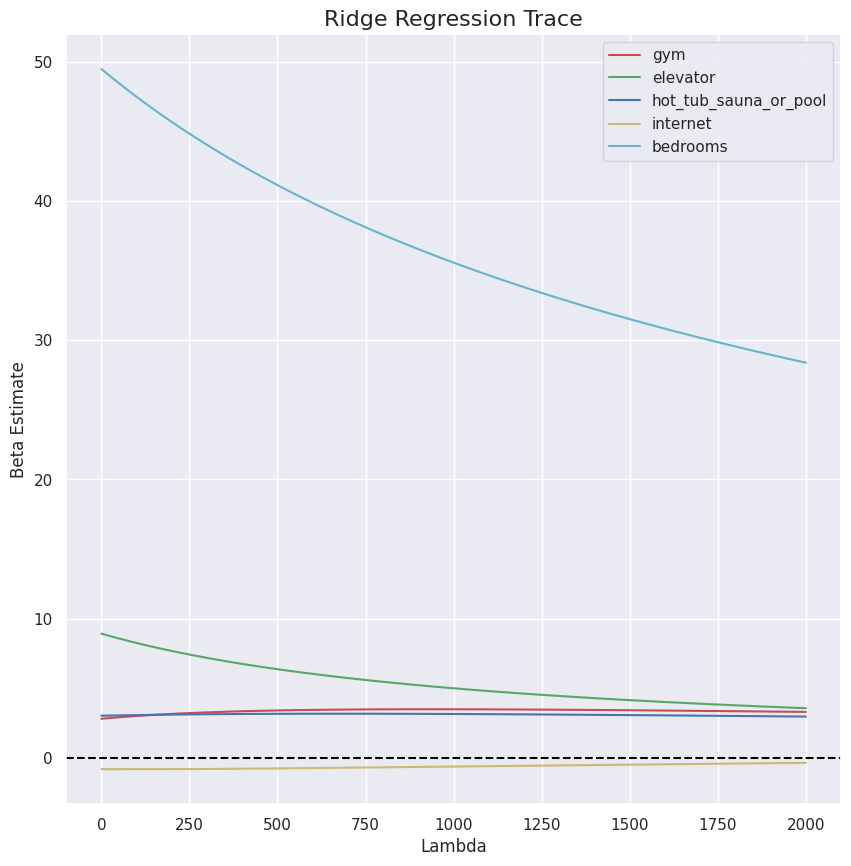

In [24]:
#plotting the Ridge Regression Trace
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(ridgeDF.gym,'r',ridgeDF.elevator,'g',ridgeDF.hot_tub_sauna_or_pool,'b',ridgeDF.internet,'y',ridgeDF.bedrooms,'c')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)


From this graph, we can see that the most important predictor among the 5 is bedrooms. For Ridge Regression, the beta estimate of each predictor will converge to zero (but will never reach zero) as lambda increases, the faster it converges to zero, the less important the predictor is. For this case, the most important predictor is bedrooms. The reason why the beta estimate does not reach zero is because Ridge Regression does not drop any predictors, unlike Lasso Regression, which we will observe later on.

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

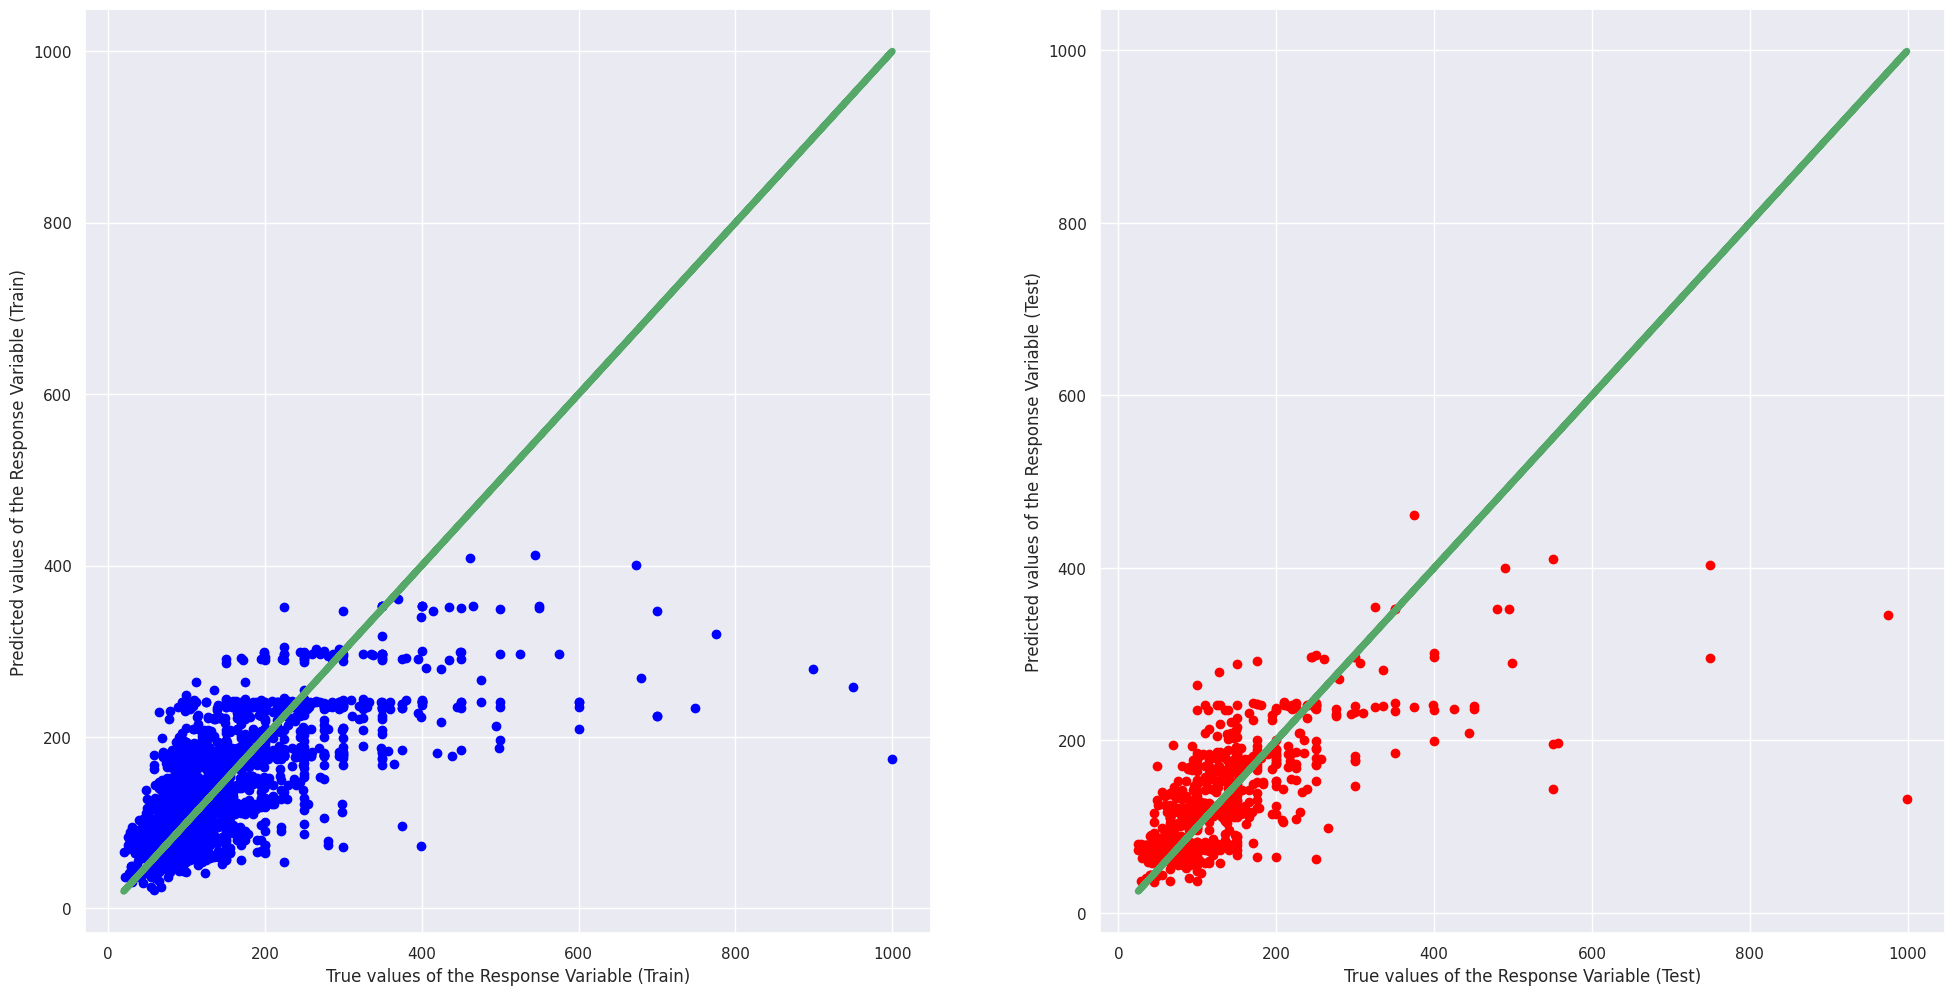

In [25]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionRidge, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionRidge, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")


Note that: Points that lie on or near the diagonal line means that the values predicted by the Ridge Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.


# Model 3: Lasso Regression
Lasso Regression is similar to Ridge Regression, meant to be an upgrade to linear regression, it also can be used for Regression and Classification.

Lasso Regression can be used for feature selection, where some predictors will be dropped after a lambda reaches a certain value.

Lasson Regression also requires a
 value to be iterated to find the best fit.

In [26]:

#initialising the model
lassoReg = Lasso(alpha=1)
lassoReg.fit(X_train, y_train)
#stores prediction
lassoTrainPred = []
lassoTestPred = []
lassoR2score=[] #stores R2 value
lassoDF = pd.DataFrame({'variable': varArr, 'estimate': lassoReg.coef_.ravel()})

lambdas = np.arange(0.01, 8.01, 0.02)#lambda value of 0.01 to 8.01, in intervals of 0.02

for alpha in lambdas:
    lassoReg = Lasso(alpha=alpha)
    lassoReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lassoDF[var_name] = lassoReg.coef_.ravel()
    #prediction
    lassoTrainPred.append(lassoReg.predict(X_train))
    lassoTestPred.append(lassoReg.predict(X_test))
    #storing the r2 score
    lassoR2score.append(lassoReg.score(X_train,y_train))


bestLassoR2 = max(lassoR2score)
print("The highest R2 value: ",bestLassoR2)


#Using the best fit Lasso Regression Model's predictions
trainPredictionLasso = lassoTrainPred[lassoR2score.index(bestLassoR2)]
testPredictionLasso = lassoTestPred[lassoR2score.index(bestLassoR2)]

lassoDF = lassoDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

lassoDF.head()

The highest R2 value:  0.5088380538170056


variable,1,bedrooms,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,...,room_type_Entire_home_apt,room_type_Private room,room_type_Shared_room,property_type_Apartment,property_type_Bed_and_Breakfast,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse
0,estimate,48.957878,-0.000000,1.892800,-0.000000,7.939204,2.689192,2.513171,-0.000000,-1.438270,...,22.681471,-0.0,-4.412788,-2.033374,1.882579,0.498511,-0.0,2.524988,2.556301,0.000000
1,estimate0.01,49.471688,-0.360779,2.527268,-0.063757,8.909404,2.804796,3.018296,-0.807270,-2.506669,...,23.282316,-0.0,-5.180516,-3.504084,3.144510,1.012185,-0.0,3.522427,3.658253,0.511674
2,estimate0.03,49.457678,-0.338743,2.512025,-0.041537,8.892331,2.803338,3.007209,-0.786708,-2.486330,...,23.273753,-0.0,-5.166549,-3.475640,3.117447,1.001099,-0.0,3.503470,3.637883,0.493448
3,estimate0.049999999999999996,49.443068,-0.316719,2.496366,-0.019619,8.873456,2.800628,2.996864,-0.766178,-2.466038,...,23.265743,-0.0,-5.152427,-3.448306,3.090358,0.989544,-0.0,3.484377,3.617415,0.475257
4,estimate0.06999999999999999,49.429624,-0.295187,2.481124,-0.000000,8.852398,2.797100,2.986872,-0.745308,-2.445667,...,23.256445,-0.0,-5.138240,-3.420093,3.063137,0.978259,-0.0,3.465375,3.596973,0.457121


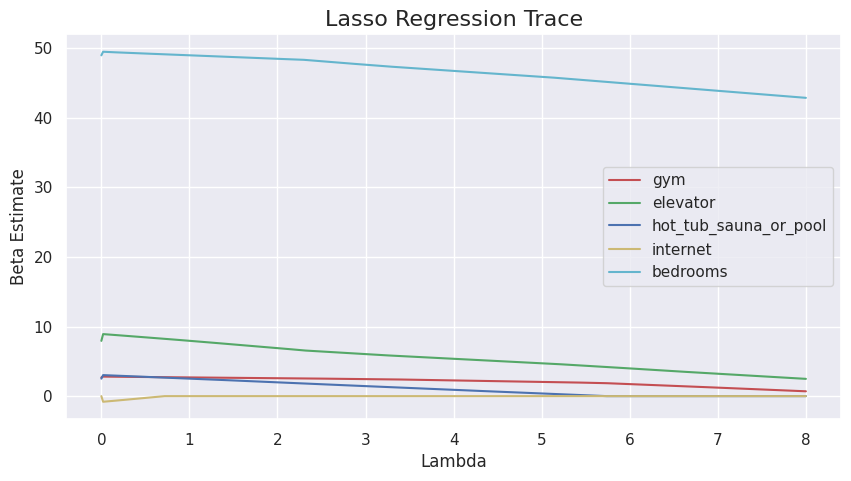

In [27]:

#Plot the Lasso Regression Trace
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lassoDF.gym,'r',lassoDF.elevator,'g',lassoDF.hot_tub_sauna_or_pool,'b',lassoDF.internet,'y',lassoDF.bedrooms,'c')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 100, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)


From this graph, we can see that the most important predictor among the 5 is also bedrooms. For Lasso Regression, the faster the beta estimate of the predictor reaches zero (the predictor has been dropped) as lambda increases, the less important the predictor is. As we can see from the graph, bedrooms does not even hit zero after when has reached its highest value of 8, compared to the beta estimate of hot_tub_sauna_or_pool which reached zero a lot faster than bedrooms.

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

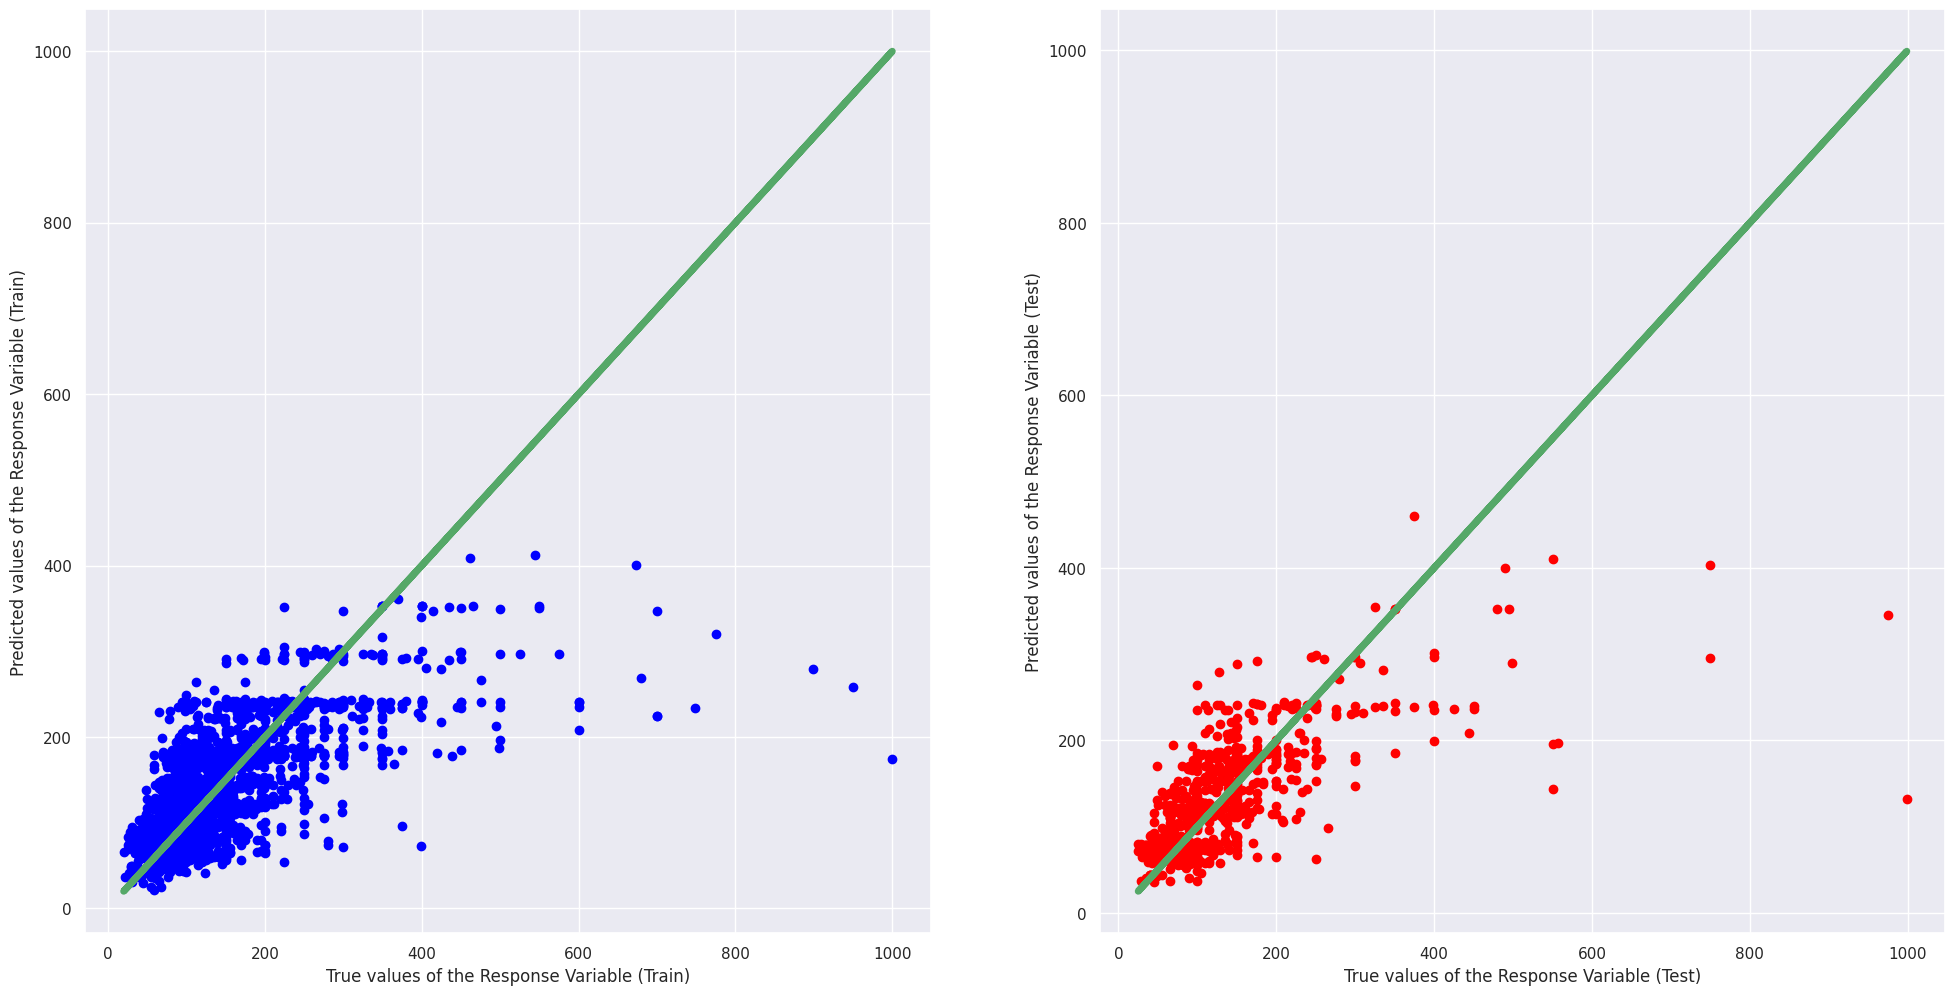

In [28]:

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")


Note that: Points that lie on or near the diagonal line means that the values predicted by the Lasso Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

# Model 4: Random Forest Regression
Random Forest is an emsemble technique that is able to perform both Regression and Classification tasks with the use of multiple decision trees and a technique that is called Bootstrap Aggression. The idea behind this technique is to combine multiple decision trees in its prediction rather than replying on individual decision trees.

Here, we use the RandomForestRegressor to help predict the price.

In [29]:
# Tuning of Parameters

# random_grid = {'n_estimators': [2000],
#                'max_features': [2,5],
#                'max_depth': [40,70],
#                'min_samples_split': [40,50],
#                'max_leaf_nodes':[50,70],
#                'max_features': [2,5]}
# rf_tune = RandomForestRegressor()
# rf_random = GridSearchCV(estimator = rf_tune, param_grid = random_grid, cv = 3, verbose=2,n_jobs = 2)

# rf_random.fit(X_train,y_train)

# print(rf_random.best_estimator_)


To optimize the parameters used in the Random Forest Regression modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10, max_features=5, max_leaf_nodes=30, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5).fit(X_train,y_train)

# Predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

In [32]:

importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

,Weight
property_type_Bed_and_Breakfast,0.001943
property_type_Loft,0.003041
property_type_Townhouse,0.003491
accessible,0.003517
internet,0.004298
secure,0.004601
pets_allowed,0.004722
property_type_Condominium,0.004911
breakfast,0.005473
white_goods,0.008703


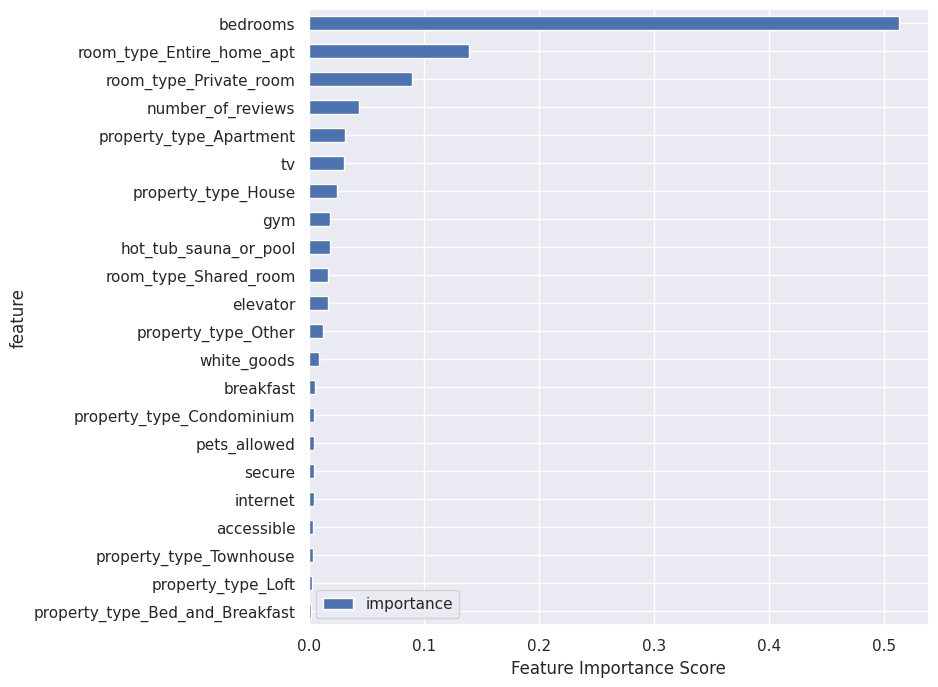

In [33]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()


Importance provides a score that indicates how useful or valuable each feature was in the construction of the decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the bar chart above, the predictor variable that is associated with a taller bar means that the variable has a higher importance in the Random Tree Regression Model in predicting price.

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

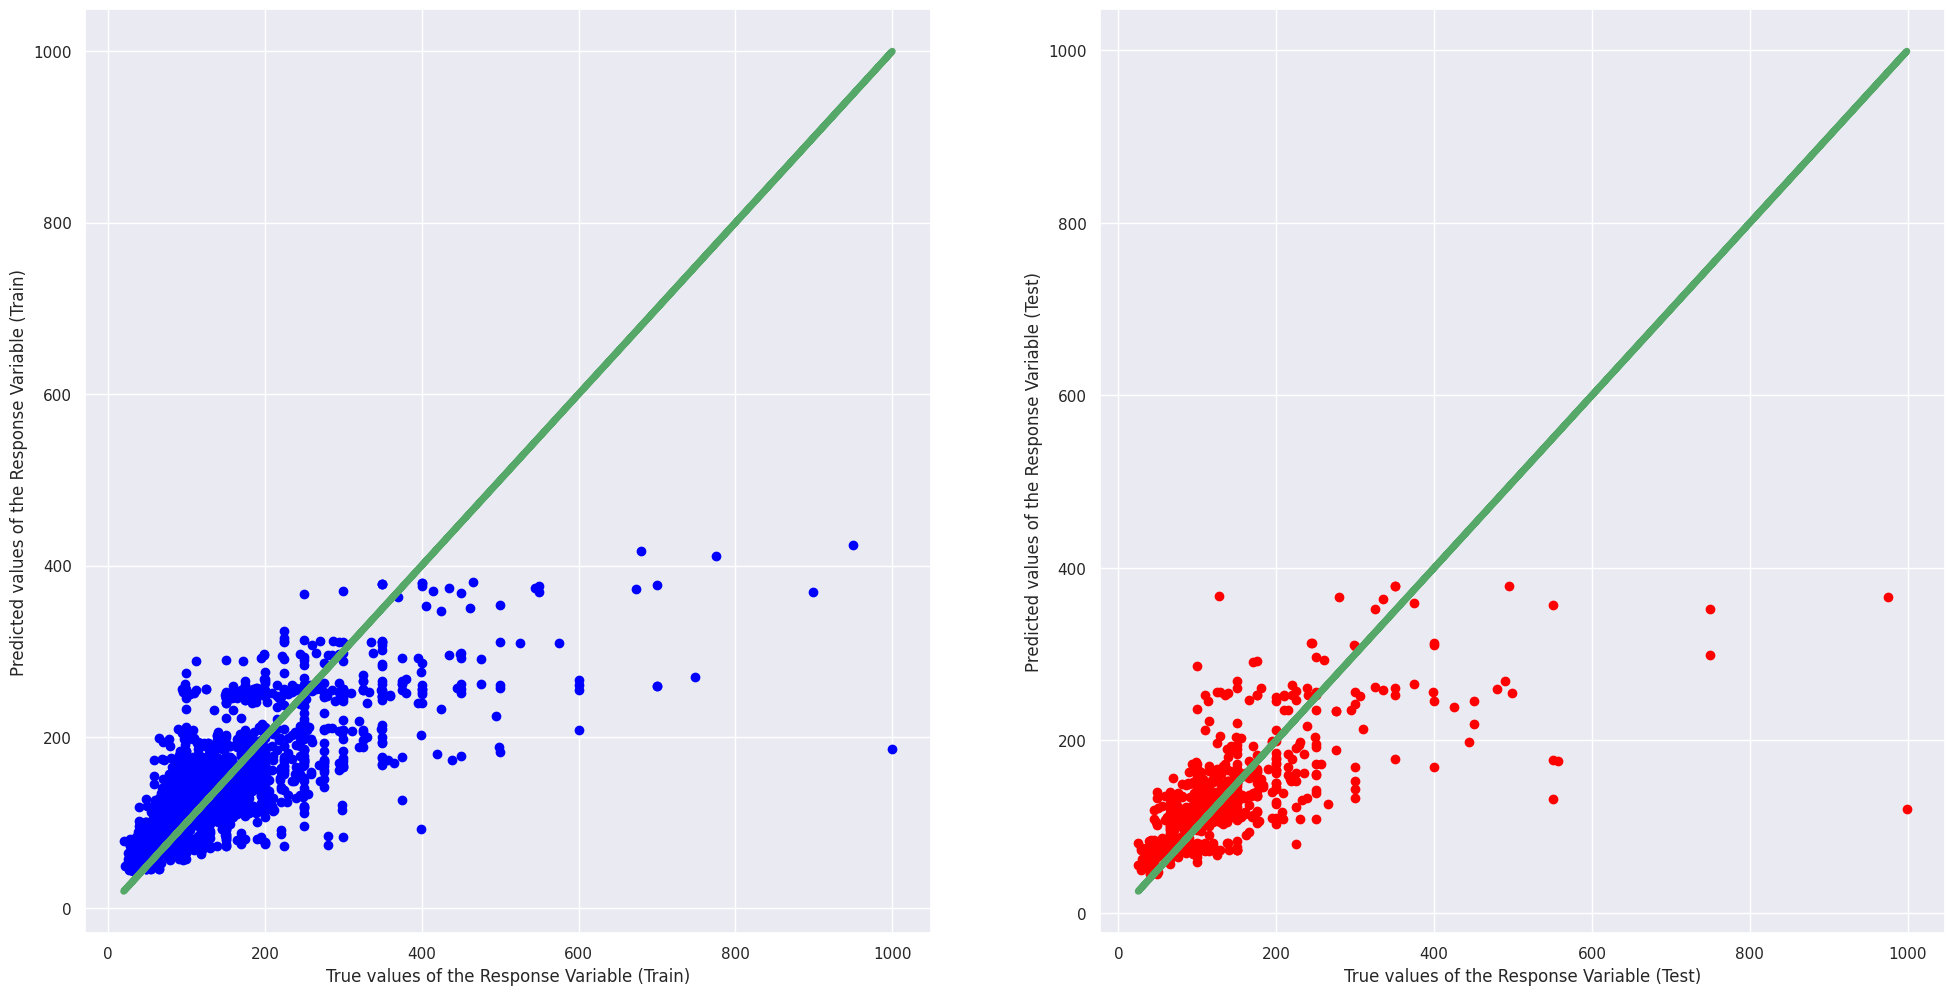

In [34]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Note that: Points that lie on or near the diagonal line means that the values predicted by the Random Forest Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

# Model 5 : XGBoost
XGBoost is an open source library that provides a high-performance implementation of gradient boost decision trees (similar to the decision trees that we have learnt). It is a machine learning model that is able to perform prediction tasks regardless of Regression or Classification.

The key idea of Gradient Boosted Decision Trees is that they build a series of trees in which each tree is trained so that it attempts to correct the mistakes of the previous tree in the seroes.

In [35]:
#Tuning the Parameters

# parameters_for_testing = {
#     'colsample_bytree':[0.3,0.5],
#     'learning_rate':[0.1,0.5],
#     'alpha': [10,12],
#     'max_depth':[3,5],
#     'n_estimators':[2000],
# }


# xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#      gamma=0, colsample_bytree=0.8)

# gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
# gsearch1.fit(X_train,y_train)

# print(gsearch1.best_estimator_)


To optimize the parameters used in the XGBoost modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3, gamma=0, importance_type='gain', learning_rate=0.1, max_delta_step=0, max_depth=3, min_child_weight=1, missing=None, n_estimators=2000, n_jobs=1, nthread=None, objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=1, verbosity=1)

In [36]:
# Fitting and Training the model for Train & Test sets
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xgb_reg.fit(X_train,y_train)

# Predicting using the model
trainPredictin_xgb_reg = xgb_reg.predict(X_train)
testPredictin_xgb_reg = xgb_reg.predict(X_test)

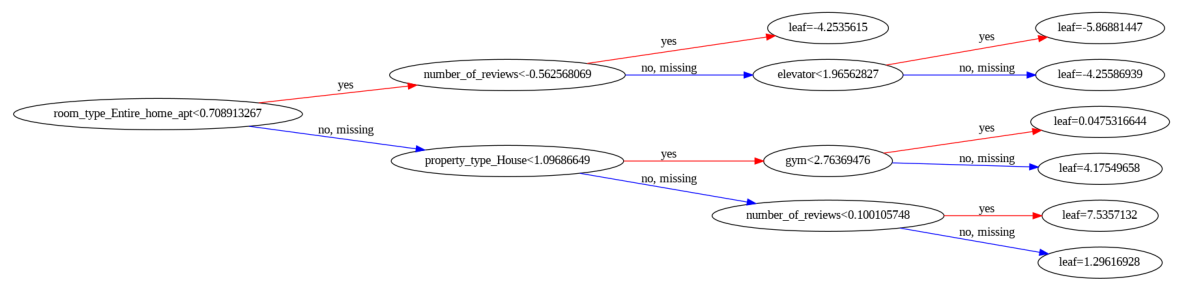

In [37]:
# Ploting decision tree
xgb.plot_tree(xgb_reg, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 20)

In [38]:
# Weightage/Importance of each variable
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
property_type_Townhouse,0.006119
internet,0.007077
property_type_Loft,0.008151
breakfast,0.010091
property_type_Bed_and_Breakfast,0.010111
accessible,0.012684
secure,0.014699
pets_allowed,0.016410
elevator,0.019410
white_goods,0.020040


Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the table above, the predictor variable that is associated with a higher number means that the variable has a higher importance in the XGBoost Regression Model in predicting price.

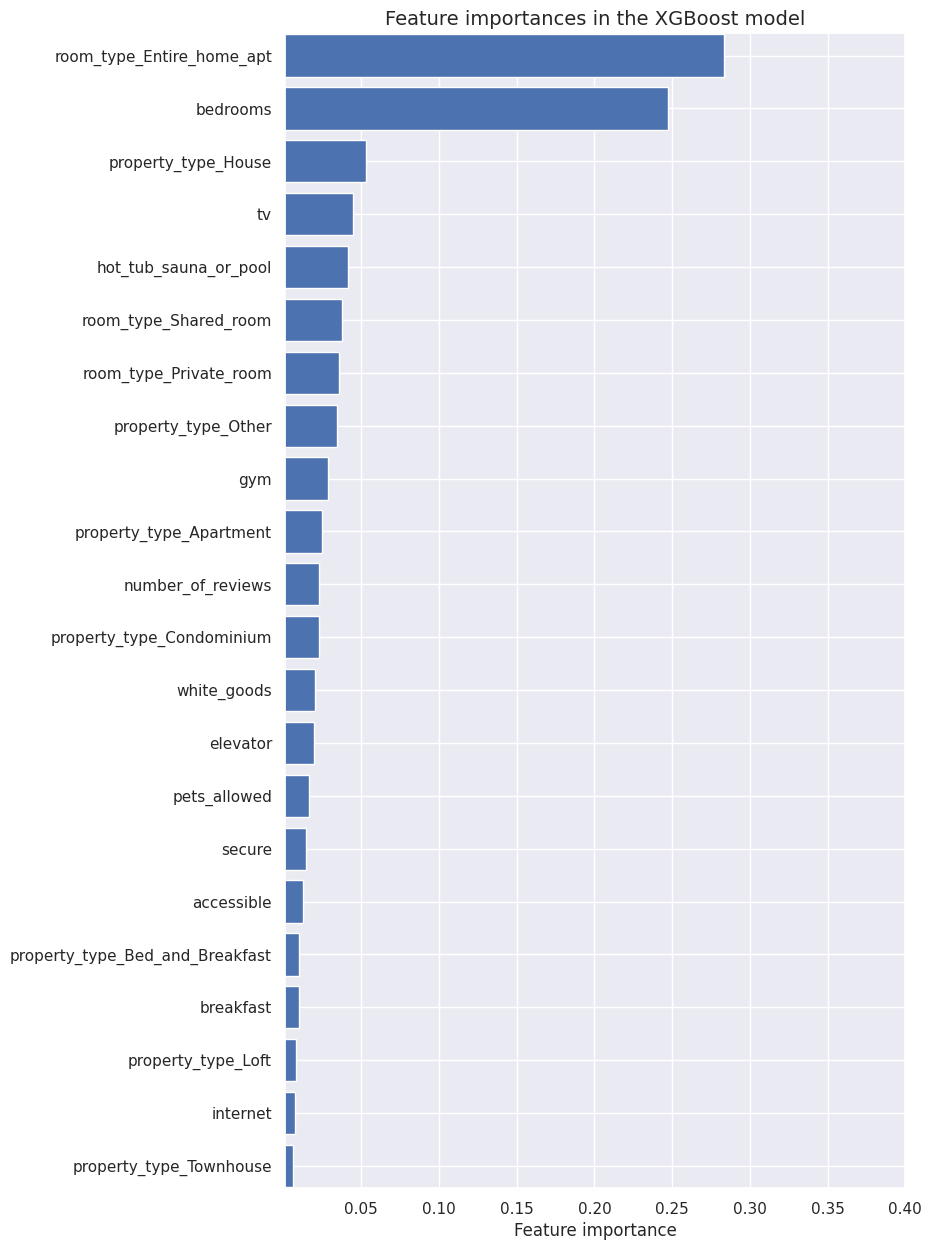

In [39]:

# Plotting feature importances
plt.figure(figsize=(8,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center')
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.4)
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

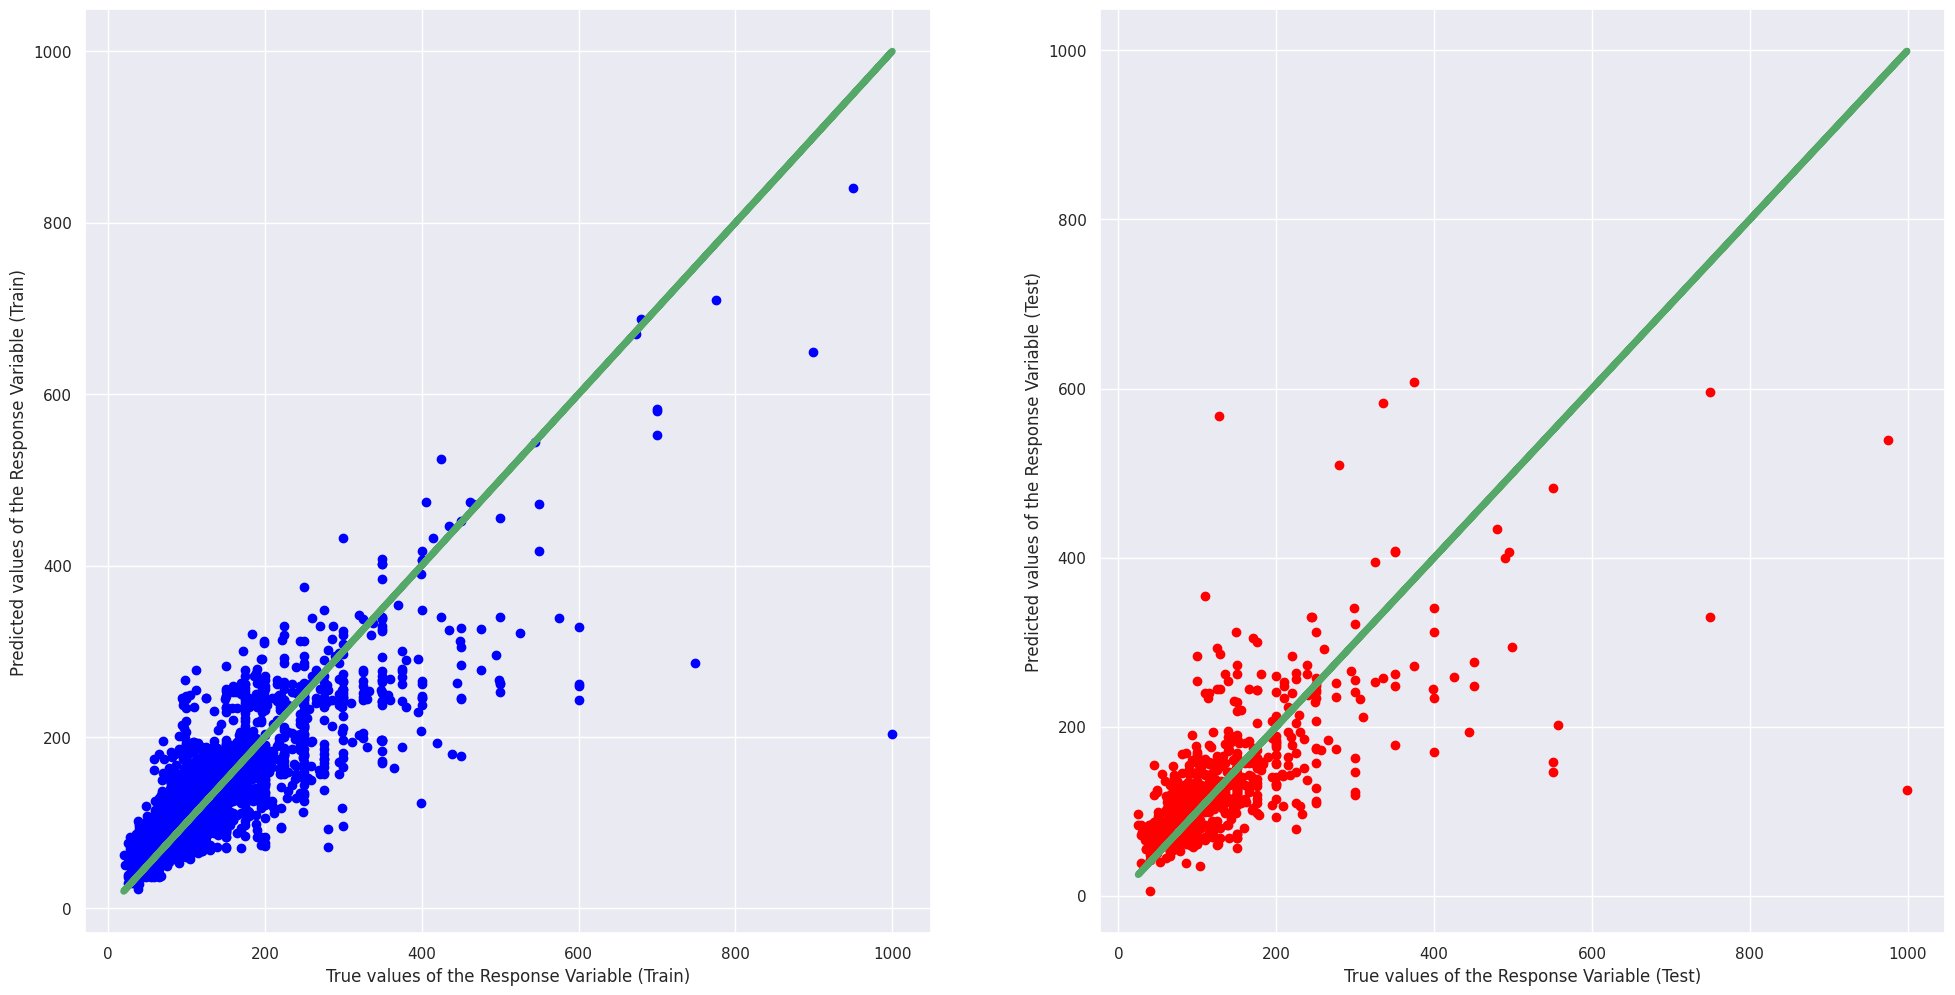

In [40]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_xgb_reg, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_xgb_reg, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Note that: Points that lie on or near the diagonal line means that the values predicted by the XGBoost Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.


# Model 6: CatBoost
CatBoost is a high performance open source gradient boosting on decision trees. It can be used to solve both Classification and Regression problems.

In [41]:
# catBoost = CatBoostRegressor()
# parameters = {'depth'         : [3,5],
#                 'learning_rate' : [0.1,0.5],
#                 'iterations'    : [2000]
#                 }
# grid = GridSearchCV(estimator=catBoost, param_grid = parameters, cv = 2, n_jobs=6)
# grid.fit(X_train, y_train)

# print("\n The best parameters across ALL searched params:\n",
#           grid.best_params_)


To optimize the parameters used in the CatBoost modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

{'depth': 3, 'iterations': 2000, 'learning_rate': 0.1}

In [42]:
# Creating and fitting the model
CatB=CatBoostRegressor(iterations=2000, depth=3, learning_rate=0.1,loss_function='RMSE')
CatB.fit(X_train, y_train,plot=True);

# Predicting based on the model
trainPrediction_CatB = CatB.predict(X_train)
testPrediction_CatB = CatB.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 84.2523952	total: 46.3ms	remaining: 1m 32s
1:	learn: 81.2085848	total: 46.9ms	remaining: 46.8s
2:	learn: 78.4094830	total: 47.3ms	remaining: 31.5s
3:	learn: 75.8817805	total: 47.8ms	remaining: 23.8s
4:	learn: 73.7848488	total: 48.2ms	remaining: 19.2s
5:	learn: 71.9518744	total: 48.6ms	remaining: 16.2s
6:	learn: 70.4335932	total: 49ms	remaining: 14s
7:	learn: 69.2433709	total: 49.4ms	remaining: 12.3s
8:	learn: 68.0475120	total: 49.8ms	remaining: 11s
9:	learn: 67.1007707	total: 50.3ms	remaining: 10s
10:	learn: 66.2828590	total: 50.7ms	remaining: 9.16s
11:	learn: 65.6810881	total: 51.1ms	remaining: 8.46s
12:	learn: 65.0728318	total: 51.6ms	remaining: 7.89s
13:	learn: 64.5567637	total: 52ms	remaining: 7.38s
14:	learn: 63.9588725	total: 52.4ms	remaining: 6.93s
15:	learn: 63.5153548	total: 52.8ms	remaining: 6.55s
16:	learn: 63.0900956	total: 53.2ms	remaining: 6.21s
17:	learn: 62.7920831	total: 53.6ms	remaining: 5.9s
18:	learn: 62.4766354	total: 54.1ms	remaining: 5.64s
19:	learn: 62

(0.001, 20.0)

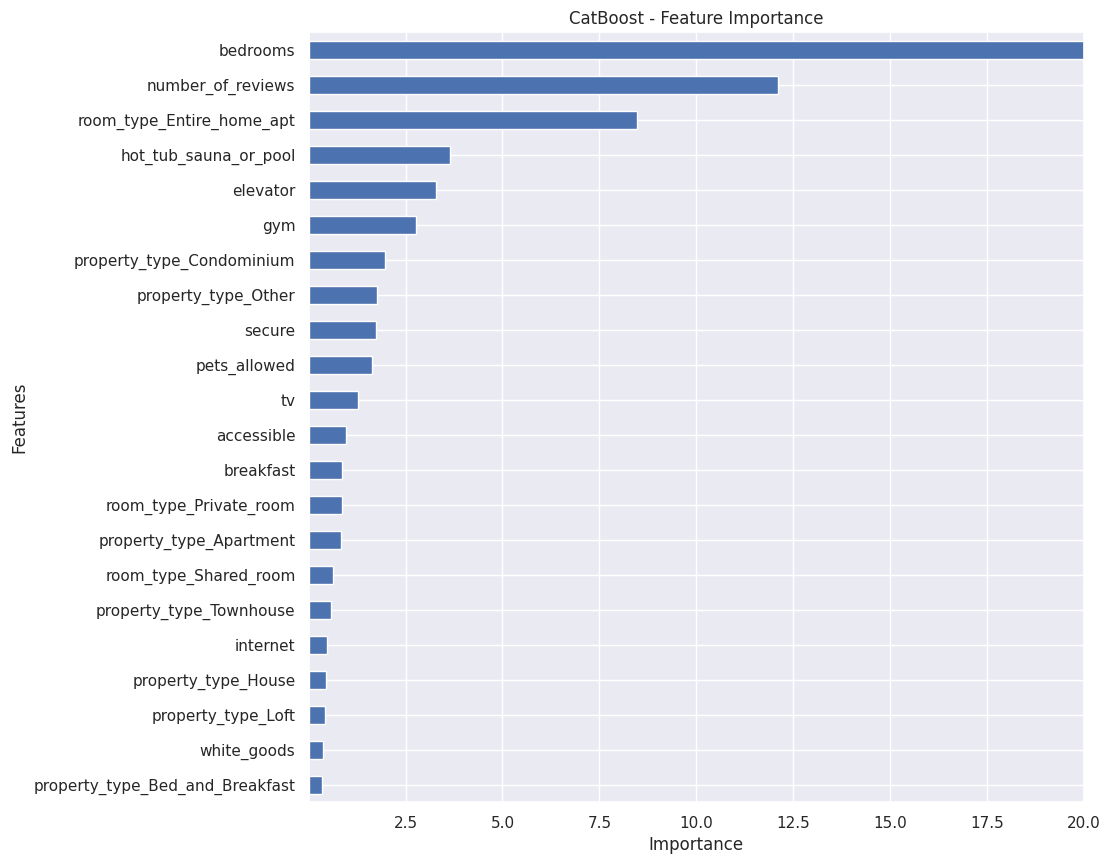

In [43]:
# Plotting the feature importance diagram
feature_impCatB = pd.DataFrame({'imp': CatB.feature_importances_, 'col': X.columns})
feature_impCatB = feature_impCatB.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
feature_impCatB.plot(kind='barh', x='col', y='imp', figsize=(10, 10), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');
plt.xlim(0.001, 20.0)

Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the bar chart above, the predictor variable that is associated with a longer bar means that the variable has a higher importance in the CatBoost Regression Model in predicting price.

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

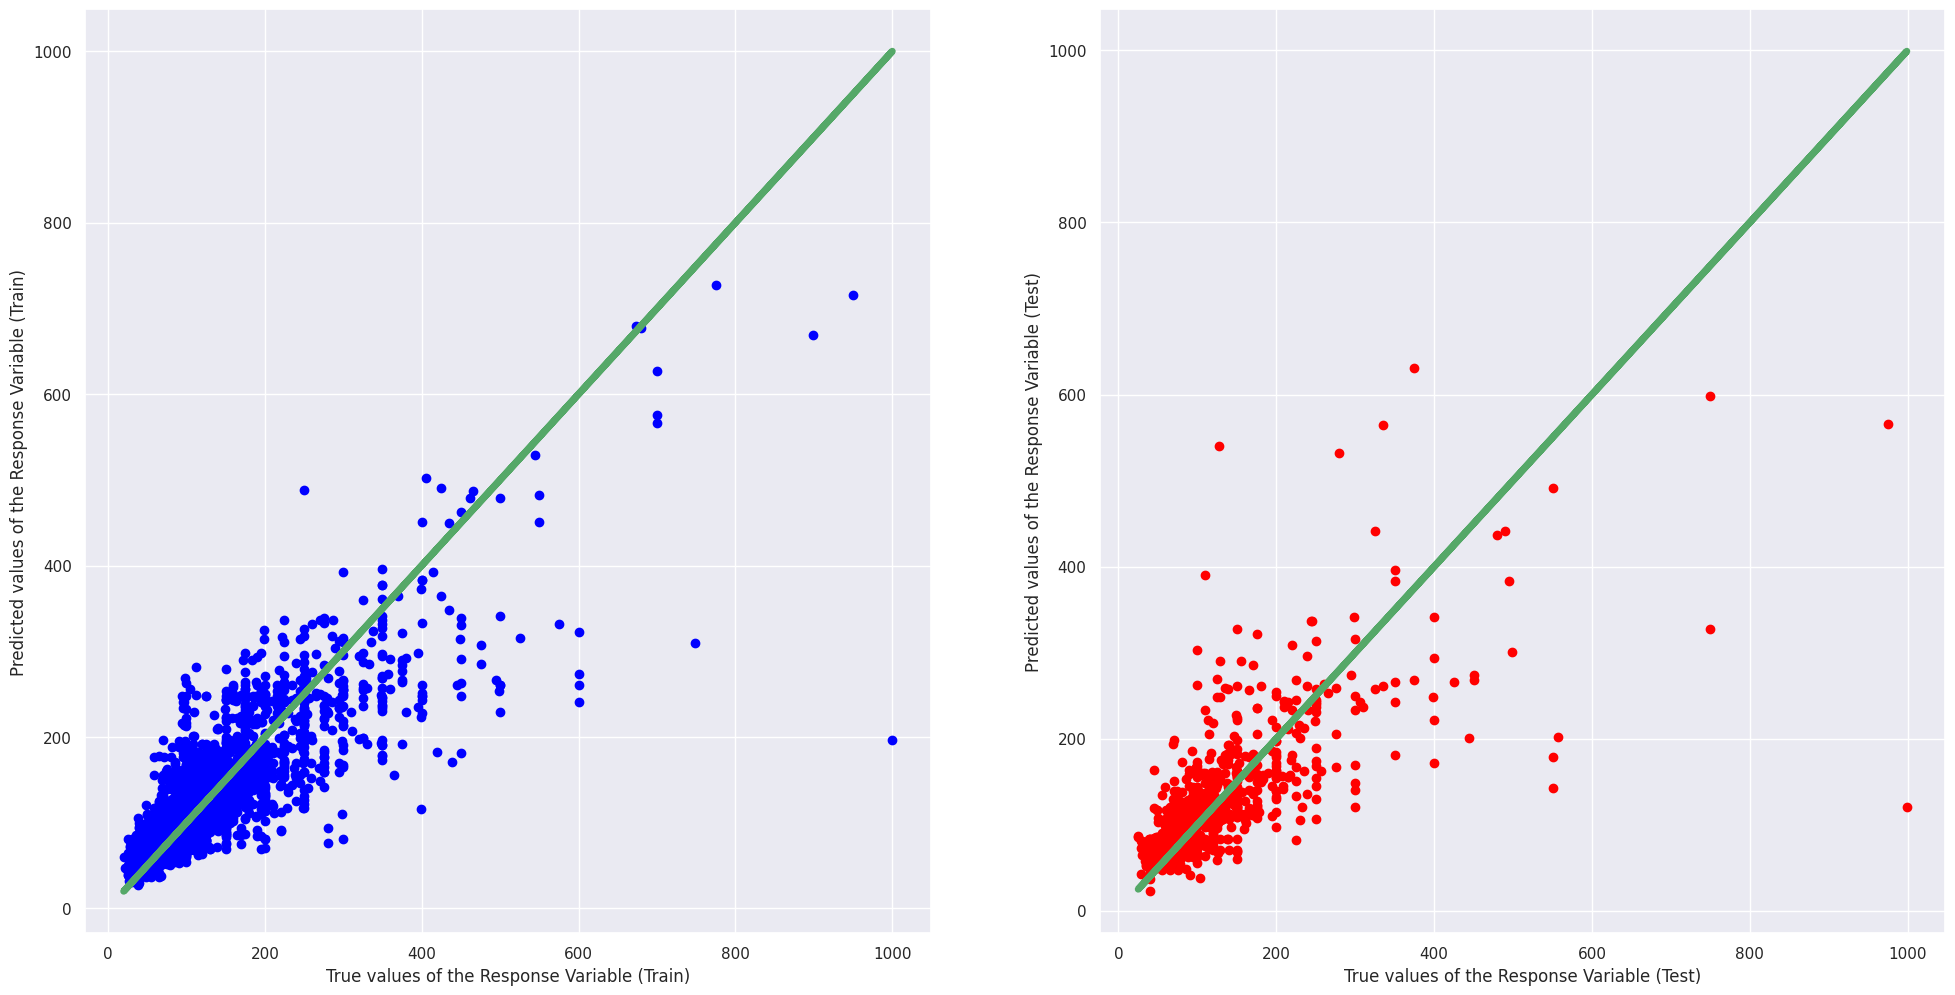

In [44]:

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPrediction_CatB, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPrediction_CatB, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Note that: Points that lie on or near the diagonal line means that the values predicted by the CatBoost Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

# Evaluation of Models
**Train Test Split**

Validation of model performance is done using Train/Test Set Split in which the data set is split into 80% : 20%.

In [45]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
print()
print("Performance Metrics for Test Set")
print("--------------------------------")
print("Linear Regression (MSE):", round(mean_squared_error(y_test, testPredictionLR),4))
print("Linear Regression (R^2):", round(r2_score(y_test, testPredictionLR),4))

print("\nRidge Regression (MSE):", round(mean_squared_error(y_test, testPredictionRidge),4))
print("Ridge Regression (R^2):", round(r2_score(y_test, testPredictionRidge),4))

print("\nLasso Regression (MSE):", round(mean_squared_error(y_test, testPredictionLasso),4))
print("Lasso Regression (R^2):", round(r2_score(y_test, testPredictionLasso),4))

print("\nRandom Forest Regression (MSE):", round(mean_squared_error(y_test, testPredictin_RF),4))
print("Random Forest Regression (R^2):", round(r2_score(y_test, testPredictin_RF),4))

print("\nXGBoost (MSE):", round(mean_squared_error(y_test, testPredictin_xgb_reg),4))
print("XGBoost (R^2):", round(r2_score(y_test, testPredictin_xgb_reg),4))

print("\nCatBoost (MSE):", round(mean_squared_error(y_test, testPrediction_CatB),4))
print("CatBoost (R^2):", round(r2_score(y_test, testPrediction_CatB ),4))


print()
print("\nPerformance Metrics for Train Set")
print("-----------------------------------")
print("Linear Regression (R^2):", round(r2_score(y_train, trainPredictionLR),4))
print("Ridge Regression (R^2):", round(r2_score(y_train, trainPredictionRidge),4))
print("Lasso Regression (R^2):", round(r2_score(y_train, trainPredictionLasso),4))
print("Random Forest Regression (R^2):", round(r2_score(y_train, trainPredictin_RF),4))
print("XGBoost (R^2):", round(r2_score(y_train, trainPredictin_xgb_reg),4))
print("CatBoost (R^2):", round(r2_score(y_train, trainPrediction_CatB ),4))

Goodness Fit on the Models (Train/Test Split):

Performance Metrics for Test Set
--------------------------------
Linear Regression (MSE): 4979.1967
Linear Regression (R^2): 0.4882

Ridge Regression (MSE): 4979.1967
Ridge Regression (R^2): 0.4882

Lasso Regression (MSE): 4979.0983
Lasso Regression (R^2): 0.4882

Random Forest Regression (MSE): 5107.6391
Random Forest Regression (R^2): 0.475

XGBoost (MSE): 5083.0195
XGBoost (R^2): 0.4775

CatBoost (MSE): 5007.1866
CatBoost (R^2): 0.4853


Performance Metrics for Train Set
-----------------------------------
Linear Regression (R^2): 0.5088
Ridge Regression (R^2): 0.5088
Lasso Regression (R^2): 0.5088
Random Forest Regression (R^2): 0.5843
XGBoost (R^2): 0.6889
CatBoost (R^2): 0.6844


However, Random Train/Test Set Splits may not always be enough as it can be subjected to selection biased during the split process (even if its randomly split). This is especially so if the dataset is small. Train/Test Set Splits can also cause over-fitted predicted models that can also affect its performance metrics.

As such, to overcome the pitfalls in Train/Test set split evaluation, k-fold Cross Validation is also performed. Here, the whole dataset is used to calcualte the performance of the regression models. This validation method is more popular simply because it generally results in a less biased or less optimistic estimate of the model.

# K-fold Cross Validation
K-Fold Cross Validation is where the dataset will be split into k number of folds in which each fold is used as a testing point.

Here, k=10 is used as it is a value that has been found to generally result in a model skill estimate with low bias and a modest variance.

In [47]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, random_state=100, shuffle=True)

scoring = ['r2', 'neg_mean_squared_error']

results_kfold_LR = cross_validate(linreg,X,y,cv=kf,scoring=scoring)
results_kfold_Ridge = cross_validate(ridgeReg,X,y,cv=kf,scoring=scoring)
results_kfold_Lasso = cross_validate(lassoReg,X,y,cv=kf,scoring=scoring)
results_kfold_RF = cross_validate(RF,X,y,cv=kf,scoring=scoring)
results_kfold_XGB = cross_validate(xgb_reg,X,y,cv=kf,scoring=scoring)
results_kfold_CatB = cross_validate(CatB,X,y,cv=kf,scoring=scoring)

Streaming output truncated to the last 5000 lines.
1000:	learn: 53.5760793	total: 498ms	remaining: 497ms
1001:	learn: 53.5742866	total: 498ms	remaining: 496ms
1002:	learn: 53.5723420	total: 499ms	remaining: 496ms
1003:	learn: 53.5643909	total: 499ms	remaining: 495ms
1004:	learn: 53.5613517	total: 500ms	remaining: 495ms
1005:	learn: 53.5586618	total: 500ms	remaining: 494ms
1006:	learn: 53.5569763	total: 501ms	remaining: 494ms
1007:	learn: 53.5534463	total: 501ms	remaining: 493ms
1008:	learn: 53.5531616	total: 502ms	remaining: 493ms
1009:	learn: 53.5487842	total: 502ms	remaining: 492ms
1010:	learn: 53.5485420	total: 503ms	remaining: 492ms
1011:	learn: 53.5453369	total: 503ms	remaining: 491ms
1012:	learn: 53.5437575	total: 504ms	remaining: 491ms
1013:	learn: 53.5432656	total: 504ms	remaining: 490ms
1014:	learn: 53.5342161	total: 505ms	remaining: 490ms
1015:	learn: 53.5213379	total: 505ms	remaining: 489ms
1016:	learn: 53.5200604	total: 506ms	remaining: 489ms
1017:	learn: 53.5169232	total: 

In [48]:
print ("Goodness Fit on the Models (K-Fold Cross Validation):")
print()

print("Linear Regression R^2:" , round(results_kfold_LR['test_r2'].mean(),4))
print("Ridge Regression R^2:" , round(results_kfold_Ridge['test_r2'].mean(),4))
print("Lasso Regression R^2:" , round(results_kfold_Lasso['test_r2'].mean(),4))
print("Random Forest R^2:" , round(results_kfold_RF['test_r2'].mean(),4))
print("XGBooost R^2:" , round(results_kfold_XGB['test_r2'].mean(),4))
print("CatBoost R^2:",round(results_kfold_CatB['test_r2'].mean(),4))
print()
print("Linear Regression MSE:" , -round(results_kfold_LR['test_neg_mean_squared_error'].mean(),4))
print("Ridge Regression MSE:" , -round(results_kfold_Ridge['test_neg_mean_squared_error'].mean(),4))
print("Lasso Regression MSE:" , -round(results_kfold_Lasso['test_neg_mean_squared_error'].mean(),4))
print("Random Forest MSE:" , -round(results_kfold_RF['test_neg_mean_squared_error'].mean(),4))
print("XGBooost MSE:" , -round(results_kfold_XGB['test_neg_mean_squared_error'].mean(),4))
print("CatBoost MSE:",-round(results_kfold_CatB['test_neg_mean_squared_error'].mean(),4))

Goodness Fit on the Models (K-Fold Cross Validation):

Linear Regression R^2: 0.496
Ridge Regression R^2: 0.4594
Lasso Regression R^2: 0.472
Random Forest R^2: 0.5186
XGBooost R^2: 0.4918
CatBoost R^2: 0.4989

Linear Regression MSE: 4097.8524
Ridge Regression MSE: 4470.1898
Lasso Regression MSE: 4331.607
Random Forest MSE: 3953.3463
XGBooost MSE: 4069.5571
CatBoost MSE: 4010.7019


# Observation

An interesting observation was that the MSE and R^2 values of the Linear Regression, Ridge Regression and Lasso Regression are very close to each other, this is most probably due to the similarities in the 3 models, as the Ridge and Lasso Regression model are supposed to be an upgraded version of Linear Regression.

# The Most Important Features of a Property Listing
From the evaluation of models, we can see that Random Forest Regression is the best (among all the others) at predicting price. With this information, we do further analysis to find out which feature is the most important.

We first test out its prediction on a specific instance. Then, using a library called TreeInterpreter, we decompose the Random Forest prediction into a sum of contributions from each feature:

(Prediction = Bias + Feature1 x Contribution1 + … + FeatureN x ContributionN.)

This will show us how each individual feature contributed in its prediction based on individual results. A positive result would mean that the feature has a positive impact on the prediction while a negative result shows a negative impact.

If the prediction of price is fairly accurate (comparing to its true value), then its contributions of individual features would also be deemed fairly reliable.



In [51]:
%pip install treeinterpreter

In [52]:
from treeinterpreter import treeinterpreter as ti
instance = X.iloc[[1235]]
trueInstance = y.iloc[[1235]]
prediction, bias, contributions = ti.predict(RF,instance)

/usr/local/lib/python3.11/dist-packages/treeinterpreter/treeinterpreter.py:108: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  contribs[feature_index[path[i]]] += contrib


In [53]:
for i in range(len(instance)):
    print("True Value:",trueInstance['price'])
    print()
    print("Prediction:", prediction)
    print()
    print ("Feature contributions:")
    print ("-"*25)
    for c, feature in sorted(zip(contributions[i],
                                 X.columns),
                             key=lambda x: -abs(x[0])):
        print (feature, round(c, 4))

True Value: 1235    150
Name: price, dtype: int64

Prediction: [[153.73312112]]

Feature contributions:
-------------------------
bedrooms -23.1669
hot_tub_sauna_or_pool 18.124
gym 11.7344
room_type_Entire_home_apt 10.3622
room_type_Private_room 7.3439
elevator 5.8918
tv 3.3092
property_type_Apartment -2.7156
property_type_House -1.8783
white_goods -1.8611
number_of_reviews -1.8098
secure -1.7514
accessible 1.2147
room_type_Shared_room 0.7916
pets_allowed 0.5493
internet 0.136
property_type_Townhouse -0.0891
breakfast 0.0889
property_type_Loft -0.0582
property_type_Condominium -0.0541
property_type_Other 0.009
property_type_Bed_and_Breakfast 0.002


In this case as seen above, the predicted value of instance 1235 is a very decently good prediction of its true value (150.86 vs 150). As such, if we look at the feature contributions, having amenities such as a hot tub/sauna/pool, gym or elevator is important in influencing price.

To explain why 'bedrooms' has such a negative contribution (even though from previous analysis, it has shown that it is a great impacter), it is because for this particular instance, the bedroom is valued at 0. As such, it can be said that while bedroom is at a negative contribution value, it is still one of the most important feature of a property listing.

## Conclusion

From the information above, by comparing the MSE (for test sets) and R^2 (for train sets) of the different models (in which the lower the MSE & higher the R^2 is, the more accurate it is), we can see which regression model is the best at predicting the price of a listing based on room_type, property_type, bedrooms, amenities and number_of_reviews.

As seen from both validation methods, we can see that Random Forest Regression showed the best results, with the highest R^2 value and the lowest MSE value.

The different graphs of True Values VS Predicting Values for each regression model (can be seen under the heading of the different models) can also give us a rough idea on which model is best at predicting. As such, our conclusion above can be said true as the graph of the Random Forest Regression generally has the most number of points situated near the diagonal line.


Answering the Problem
From all the analysis done, we can confidently answer our initial question of the factors that make a listing more expensive. An aspiring AirBnb host, if investing on a new property in Seattle, should focus on the following factors to maximize the price of his listing. Additionally a traveller who wants to pay the lowest possible price for a listing might want to avoid having these features in his prospective housing :

Entire properties listed instead of just a single room fetch the highest prices.
Apartment and landed house tend to be the most expensive and the most abundant properties in AirBnb.
The more bedrooms a property has, the higher its price. The highest prices are fetched by 6 room properties.
There are plenty of listings in 'Belltown' or 'West Queen Anne' and they tend to be expensive.
Words like: 'view', 'modern' & 'walk' all frequently appear in the summary of the more expensive listing.
Ammenities such as: 'Washer', Dryer', 'Heating', 'Wireless Internet', 'Smoke Detector', 'Free Parking', 'Kid Friendly', 'TV', 'HotTub/Sauna/Pool', 'Gyms' and 'Elevators' are all common among the more expensive listings.
The reviews a listing gets (quality or quantity) does not have much of an impact in its price.
Answering the Problem
From all the analysis done, we can confidently answer our initial question of the factors that make a listing more expensive. An aspiring AirBnb host, if investing on a new property in Seattle, should focus on the following factors to maximize the price of his listing. Additionally a traveller who wants to pay the lowest possible price for a listing might want to avoid having these features in his prospective housing :

- Entire properties listed instead of just a single room fetch the highest prices.
- Apartment and landed house tend to be the most expensive and the most abundant properties in AirBnb.
- The more bedrooms a property has, the higher its price. The highest prices are fetched by 6 room properties.
- There are plenty of listings in 'Belltown' or 'West Queen Anne' and they tend to be expensive.
- Words like: 'view', 'modern' & 'walk' all frequently appear in the summary of the more expensive listing.
- Ammenities such as: 'Washer', Dryer', 'Heating', 'Wireless Internet', 'Smoke Detector', 'Free Parking', 'Kid Friendly', 'TV', 'HotTub/Sauna/Pool', 'Gyms' and 'Elevators' are all common among the more expensive listings.
- The reviews a listing gets (quality or quantity) does not have much of an impact in its price.